# Predicting the Survival: Logistic Regression, RandomForestClassifier, DecisionTreeClassifier

## 0. Importing Libraries and Importing Datasets

### 0.1 Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import math
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

### 0.2 Loading the Datasets

In [2]:
train_df = pd.read_csv(r'.\LoR_DT_RF\train.csv')
test_df = pd.read_csv(r'.\LoR_DT_RF\test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 1. Exploratory Data Analysis

### 1.1 Understanding the Datasets

In [5]:
train_df.shape

(891, 12)

In [6]:
test_df.shape

(418, 11)

In [7]:
train = train_df.copy()
test = test_df.copy()

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### What are the various features of the dataset?

In [10]:
print(list(train.columns))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


#### Are there any Missing (NaN) values?

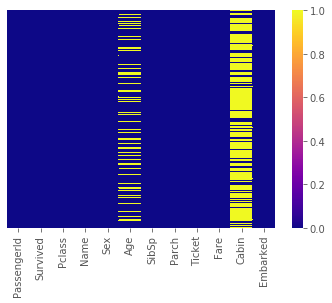

In [11]:
sns.heatmap(train.isnull(),yticklabels=False, cmap='plasma')

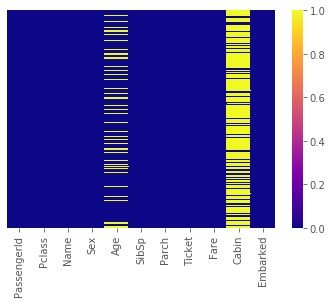

In [12]:
sns.heatmap(test.isnull(),yticklabels=False, cmap='plasma')

Most of the Missing Values occur in Cabin and Age feature.

### 1.2 Understanding the various features in Training Data

In [13]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### Distribution of Different Features across Samples

In [15]:
sns.set_style('whitegrid')

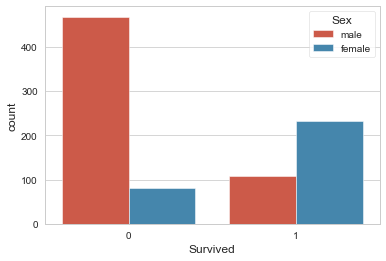

In [16]:
sns.countplot(x=train['Survived'],data=train,hue='Sex')
plt.show()

**Inference**: More males failed to survive than females.

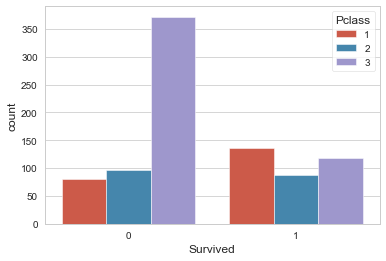

In [17]:
sns.countplot(x=train['Survived'],data=train,hue='Pclass')
plt.show()

**Inference**: More people from Pclass = 3 failed to survive.

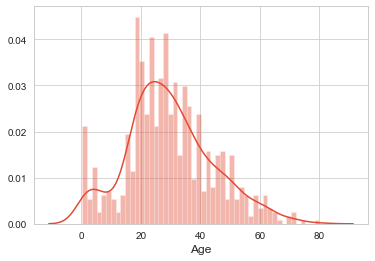

In [18]:
sns.distplot(train['Age'].dropna(),kde=True,bins=50)

**Inference**: The feature is not fully but somewhat normalized.

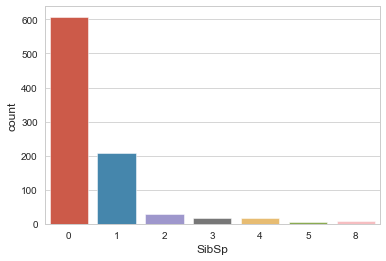

In [19]:
sns.countplot(x='SibSp',data=train)

**Inference**: There's a huge class imbalance between SibSp = 0 and others.

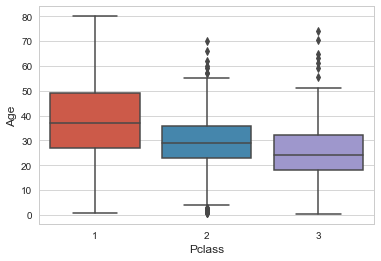

In [20]:
sns.boxplot(x='Pclass',y='Age',data=train)

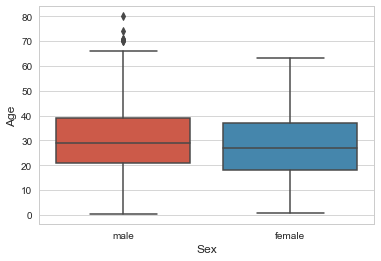

In [21]:
sns.boxplot(x='Sex',y='Age',data=train)

**Inference**: Age Distribution across genders was somewhat equal - the median age for male passengers was approx 30, while for females it was around 28.

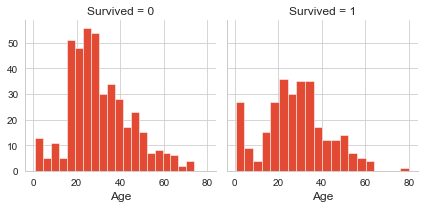

In [23]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

**Inference**: Age Distribution of people who survived or did not survive, tells us that more young people managed to survive than the old, which means Age does have a correlation with the Survival. Lte;s understand this distribution better.

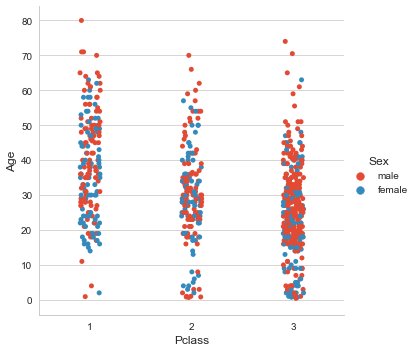

In [24]:
sns.catplot(x="Pclass",y="Age",hue="Sex",data=train)

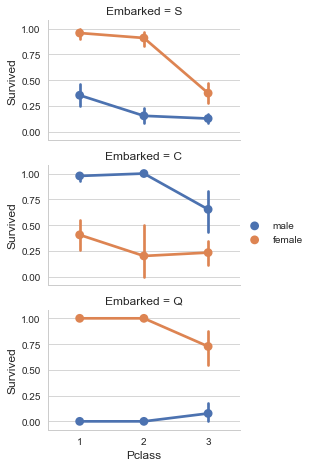

In [25]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

**Inference**: Could not gather much of an inference fromthese plots, except the distribution of survived males and feamles across Pclasses

### 1.2 Removing Missing Values

In [26]:
combined_data = pd.concat((train, test)).reset_index(drop=True)

for df in [train, test]:
    df['Age'] = train['Age'].fillna(combined_data['Age'].median())
    df['Embarked'] = train['Embarked'].fillna('U')
    df['Fare'] = train['Fare'].fillna(combined_data['Fare'].mean())

In [27]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [28]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

Only the Cabin Feature has missing values now, but that does not matter to us since we are anyways going to remove it from the list of selected features.

### 1.3 Encoding Categorical Features

#### Encoding Sex Feature

In [29]:
for df in [train, test]:
    df.loc[(df['Sex'] == 'male'), 'Sex'] = 0
    df.loc[(df['Sex'] == 'female'), 'Sex'] = 1

In [30]:
for df in [train, test]:
    df.loc[(df['Embarked'] == 'U'), 'Embarked'] = 0
    df.loc[(df['Embarked'] == 'Q'), 'Embarked'] = 1
    df.loc[(df['Embarked'] == 'C'), 'Embarked'] = 2
    df.loc[(df['Embarked'] == 'S'), 'Embarked'] = 3

#### Dropping Features that are not needed

In [31]:
for df in [train, test]:
    df.drop('Cabin', inplace = True, axis = 1)
    df.drop('Ticket', inplace = True, axis = 1)
    df.drop('PassengerId', inplace = True, axis = 1)
    df.drop('Name', inplace = True, axis = 1)

In [32]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,3
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,3
3,1,1,1,35.0,1,0,53.1000,3
4,0,3,0,35.0,0,0,8.0500,3


In [33]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,0,0,7.2500,3
1,3,1,38.0,1,0,71.2833,2
2,2,0,26.0,0,0,7.9250,3
3,3,0,35.0,0,0,53.1000,3
4,3,1,35.0,1,1,8.0500,3


In [34]:
train.isna().sum().sum()
test.isna().sum().sum()

0

In [35]:
train['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [36]:
train['Embarked'].value_counts()

3    644
2    168
1     77
0      2
Name: Embarked, dtype: int64

In [37]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [38]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [39]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

### 1.4 Scaling the Data

In [40]:
from sklearn.preprocessing import *

In [41]:
min_max_scaler = MinMaxScaler()
Y_train = pd.DataFrame(train.values[:, 0])
X_train = train.drop('Survived', axis  =1)
X_test = test

In [42]:
X_train = min_max_scaler.fit_transform(X_train)
Y_train[0] = Y_train[0].apply(int)
X_test = min_max_scaler.fit_transform(X_test)

In [43]:
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6
0,1.0,0.0,0.271174,0.125,0.000000,0.014151,1.000000
1,0.0,1.0,0.472229,0.125,0.000000,0.139136,0.666667
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,1.000000
3,0.0,1.0,0.434531,0.125,0.000000,0.103644,1.000000
4,1.0,0.0,0.434531,0.000,0.000000,0.015713,1.000000
...,...,...,...,...,...,...,...
886,0.5,0.0,0.334004,0.000,0.000000,0.025374,1.000000
887,0.0,1.0,0.233476,0.000,0.000000,0.058556,1.000000
888,1.0,1.0,0.346569,0.125,0.333333,0.045771,1.000000
889,0.0,0.0,0.321438,0.000,0.000000,0.058556,0.666667


In [44]:
Y_train

,0
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [45]:
X_test = pd.DataFrame(X_test)
X_test

,0,1,2,3,4,5,6
0,1.0,0.0,0.301696,0.000,0.000000,0.014151,1.000000
1,1.0,1.0,0.529714,0.125,0.000000,0.139136,0.666667
2,0.5,0.0,0.358700,0.000,0.000000,0.015469,1.000000
3,1.0,0.0,0.486960,0.000,0.000000,0.103644,1.000000
4,1.0,1.0,0.486960,0.125,0.111111,0.015713,1.000000
...,...,...,...,...,...,...,...
413,1.0,0.0,0.387203,0.000,0.000000,0.000000,1.000000
414,0.0,1.0,0.615220,0.000,0.000000,0.015469,1.000000
415,1.0,0.0,0.387203,0.000,0.000000,0.015713,1.000000
416,1.0,0.0,0.472709,0.000,0.000000,0.063436,1.000000


In [46]:
x_train = np.array(X_train).astype("float64")
y_train = np.array(Y_train).astype("float64")
x_test = np.array(X_test).astype("float64")

## 2. Building the Models

### 2.1 Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0).fit(x_train, y_train)

In [48]:
pred_surv = logreg.predict(x_test)
pred_surv

array([0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [49]:
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

79.91

### 2.2 RandomForestClassifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth = 15, random_state = 0)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [51]:
pred_surv_rfc = rfc.predict(x_test)
pred_surv_rfc

array([0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1.

In [52]:
acc_random_forest = round(rfc.score(x_train, y_train) * 100, 2)
acc_random_forest

96.63

### 2.3 Decision Tree Classifier

In [53]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(x_train, y_train)

In [54]:
pred_surv_dtc = dtc.predict(x_test)
pred_surv_dtc

array([0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 0.

In [55]:
acc_decision_tree = round(dtc.score(x_train, y_train) * 100, 2)
acc_decision_tree

97.98

## 3. Final Results

In [56]:
print(len(pred_surv), len(pred_surv_rfc), len(pred_surv_dtc))

418 418 418


In [57]:
results = pd.DataFrame({
    'PassengerId': [i for i in range(893, 1311)],
    'Logistic Regression': pred_surv,
    'Random Forest Classifier': pred_surv_rfc,
    'Decision Tree Classifier': pred_surv_dtc
})

In [58]:
results

,PassengerId,Logistic Regression,Random Forest Classifier,Decision Tree Classifier
0,893,0.0,0.0,0.0
1,894,1.0,0.0,1.0
2,895,0.0,0.0,0.0
3,896,0.0,1.0,1.0
4,897,0.0,0.0,0.0
...,...,...,...,...
413,1306,0.0,0.0,0.0
414,1307,1.0,1.0,1.0
415,1308,0.0,1.0,1.0
416,1309,0.0,0.0,0.0


In [61]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest','Decision Tree'],
    'Accuracy Score': [acc_log, acc_random_forest, acc_decision_tree]})
models.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score
2,Decision Tree,97.98
1,Random Forest,96.63
0,Logistic Regression,79.91
